In [1]:
from sklearn import datasets
import numpy as np
iris=datasets.load_iris()

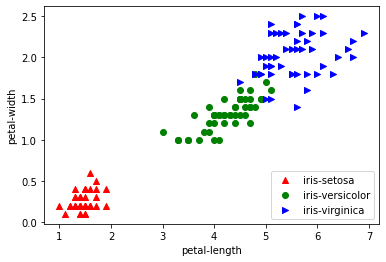

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
X=iris['data'][:,2:]
def iris_viz():
    plot_2=[]
    plot_1=[]
    plot_0=[]
    cond=iris['target']
    for i in range(150):
        if cond[i]==0:
            plot_0.append(X[i])
        elif cond[i]==1:
            plot_1.append(X[i])
        elif cond[i]==2:
            plot_2.append(X[i])
    plot_0=np.array(plot_0)
    plot_1=np.array(plot_1)
    plot_2=np.array(plot_2)
    plt.scatter(plot_0[:,0],plot_0[:,1],marker='^',color='r',label='iris-setosa')
    plt.scatter(plot_1[:,0],plot_1[:,1],marker='o',color='g',label='iris-versicolor')
    plt.scatter(plot_2[:,0],plot_2[:,1],marker='>',color='b',label='iris-virginica')
    plt.xlabel('petal-length')
    plt.ylabel('petal-width')
    plt.legend(loc=4)
iris_viz()

In [3]:
bias=np.ones((150,1))
X_T=np.c_[X,bias]
#--------one vs all multiclass classification------------#
def generate_binWeights(y):
    n_iterations=10000
    lr=0.1
    m=X.shape[0]
    weights=np.zeros((1,len(X[0])))
    weights=np.c_[weights,0]
    for i in range(n_iterations):
        z=np.dot(weights,X_T.T)
        sig=1/(1+np.exp(-z))
        gradients=(1/m)*(np.dot(X_T.T,(sig-y.T).T))
        weights=weights-(lr*(gradients.T))
    return weights
weights_iris_virginica=generate_binWeights((iris['target']==2).astype(np.int))
weights_iris_setosa=generate_binWeights((iris['target']==0).astype(np.int))
weights_iris_versicolor=generate_binWeights((iris['target']==1).astype(np.int))

In [4]:
#----------generating boundaries-------------#
x_intercept_1=(0.5-weights_iris_setosa[0][2])/weights_iris_setosa[0][0]
y_intercept_1=(0.5-weights_iris_setosa[0][2])/weights_iris_setosa[0][1]
x_intercept_2=(0.5-weights_iris_virginica[0][2])/weights_iris_virginica[0][0]
y_intercept_2=(0.5-weights_iris_virginica[0][2])/weights_iris_virginica[0][1]

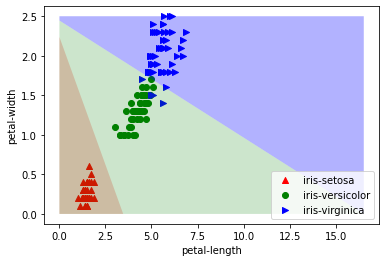

In [5]:
iris_viz()
plt.fill_between([x_intercept_1,0],[0,y_intercept_1],0,alpha=0.2,facecolor='red')
plt.fill_between([x_intercept_2,0],[0,y_intercept_2],0,alpha=0.2,facecolor='green')
plt.fill_between([x_intercept_2,0],[0,y_intercept_2],2.5,alpha=0.3,facecolor='blue')

In [6]:
def predict_proba(x):
    x=np.c_[x,1]
    proba=[]
    for weights in (weights_iris_setosa,weights_iris_versicolor,weights_iris_virginica):
        z=np.dot(weights,x.T)
        sig=1/(1+np.exp(-z))
        proba.append(sig)
    return proba
def predict_class(x):
    proba=predict_proba(x)
    best=-1
    maxi=-1
    for j in range(len(proba)):
        if proba[j]>maxi:
            maxi=proba[j]
            best=j
    if best==0:
        return 'iris_setosa'
    elif best==1:
        return 'iris_versicolor'
    elif best==2:
        return 'iris_virginica'

In [7]:
input_x=np.array([[1.4,0.2]])
print(predict_class(input_x))

iris_setosa
